In [214]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/data/run_data.csv")

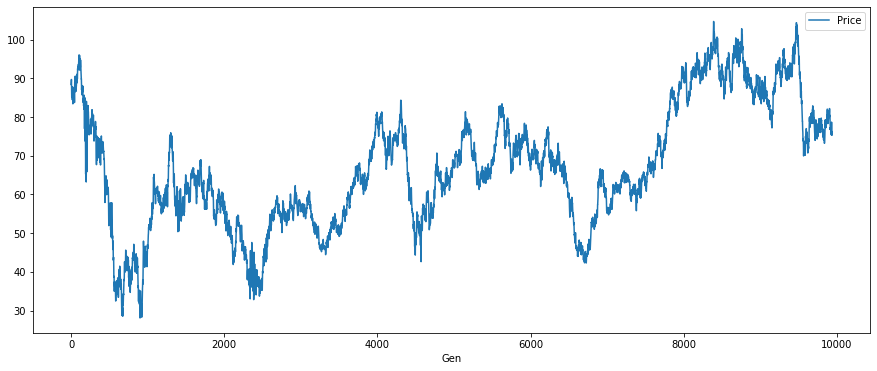

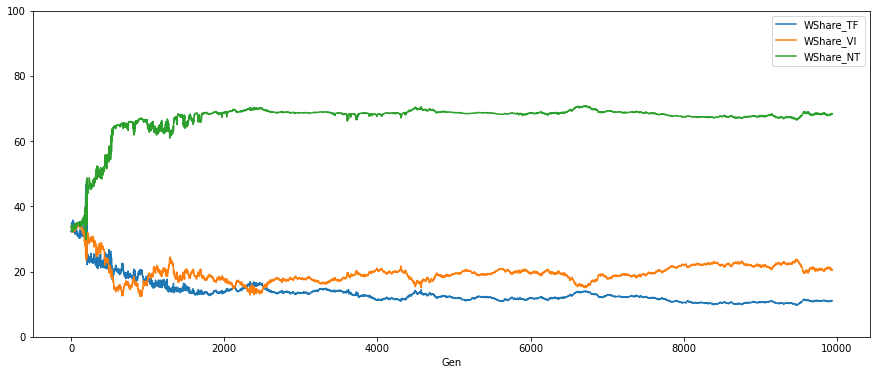

In [215]:

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
0.549270100747709 0.14919510627812643 -0.06107617626932554
Annual mean returns  
[0.14830805304679345, 0.028038290106107103, -0.003164530577615304]
Annual std returns
[0.2700093321025576, 0.18793036048942988, 0.05181284702010128]
T test for Rf = 0, VI vs TF
T test value VI-TF is 12.295265137635091
T test value VI-NT is -35.56687904673372
T test value TF-NT is -37.6723444248574
confidence intervals at 95%
[0.5281771389949911, 0.5703630625004269]
[0.12942396058760006, 0.1689662519686528]
[-0.08075653730609021, -0.04139581523256086]


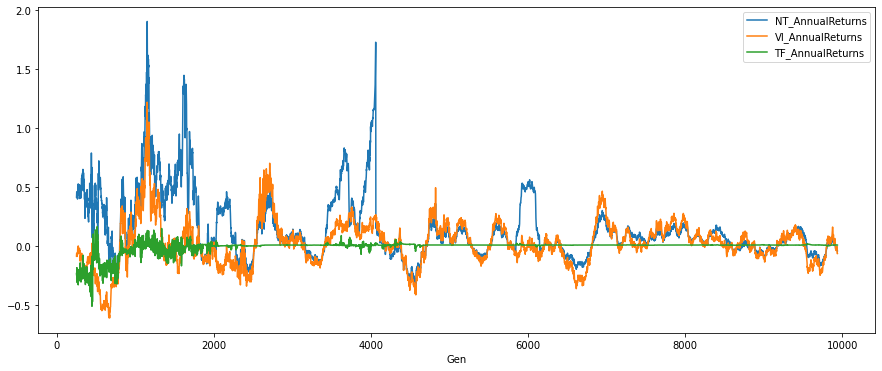

In [216]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])

print('T test for Rf = 0, VI vs TF')
df['DiffAR_VI_TF'] = df['VI_AnnualReturns'] - df['TF_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['TF_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_TF'])
obs = len(df['DiffAR_VI_TF'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-TF is ' + str(t))

df['DiffAR_VI_NT'] = df['VI_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_NT'])
obs = len(df['DiffAR_VI_NT'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-NT is ' + str(t))

df['DiffAR_TF_NT'] = df['TF_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['TF_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_TF_NT'])
obs = len(df['DiffAR_TF_NT'])
t = (srNT -srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value TF-NT is ' + str(t))


print('confidence intervals at 95%')
T = len(df['VI_AnnualReturns'])

CI_Sharpe_NT = [SharpeNT - 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T),SharpeNT + 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T)]
print(CI_Sharpe_NT)
CI_Sharpe_VI = [SharpeVI - 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T),SharpeVI + 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T)]
print(CI_Sharpe_VI)
CI_Sharpe_TF = [SharpeTF - 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T),SharpeTF + 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T)]
print(CI_Sharpe_TF)


df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()

In [217]:
SharpeNT = np.nanmean(df['NT_DayReturns']) / np.nanstd(df['NT_DayReturns'])
SharpeVI = np.nanmean(df['VI_DayReturns']) / np.nanstd(df['VI_DayReturns'])
SharpeTF = np.nanmean(df['TF_DayReturns']) / np.nanstd(df['TF_DayReturns'])

MeanNT = np.nanmean(df['NT_DayReturns'])
MeanVI = np.nanmean(df['VI_DayReturns'])
MeanTF = np.nanmean(df['TF_DayReturns'])

StdNT = np.nanstd(df['NT_DayReturns'])
StdVI = np.nanstd(df['VI_DayReturns'])
StdTF = np.nanstd(df['TF_DayReturns'])

print('Daily Mean returns')
print(MeanNT, MeanVI, MeanTF)

print('Daily Std returns')
print(StdNT, StdVI, StdTF)

print('2SD confidence intervals')
print([MeanNT - 2 * StdNT, MeanNT + 2 * StdNT])
print([MeanVI - 2 * StdVI, MeanVI + 2 * StdVI])
print([MeanTF - 2 * StdTF, MeanTF + 2 * StdTF])

print('Daily Sharpe ratios')
print(SharpeNT, SharpeVI, SharpeTF)


print('Annualised Sharpe ratios')
def annualiseSharpe(sharpe):
    return sharpe * np.sqrt(252)

print(annualiseSharpe(SharpeNT), annualiseSharpe(SharpeVI), annualiseSharpe(SharpeTF))


NT = (np.nanprod(df['NT_DayReturns'] + 1)) ** (1/len(df)) - 1
print(NT)
VI = (np.nanprod(df['VI_DayReturns'] + 1)) ** (1/len(df)) - 1
print(VI)
TF = (np.nanprod(df['TF_DayReturns'] + 1)) ** (1/len(df)) - 1
print(TF)

print(annualiseSharpe(NT/StdNT), annualiseSharpe(VI/StdVI), annualiseSharpe(TF/StdTF))

Daily Mean returns
0.00014679477019951658 0.00012307714441768582 0.00010358072534541068
Daily Std returns
0.01171396079891414 0.013078037147783668 0.015524042392468794
2SD confidence intervals
[-0.023281126827628763, 0.023574716368027798]
[-0.02603299715114965, 0.02627915143998502]
[-0.030944504059592176, 0.031151665510283]
Daily Sharpe ratios
0.01253160845587977 0.009410979876176883 0.006672277923929207
Annualised Sharpe ratios
0.19893311701135208 0.1493946740747848 0.10591912839013816
7.823974935794453e-05
3.800744336657225e-05
-2.0314659988973638e-05
0.1060288264548412 0.04613455764699213 -0.020773276808004476


In [218]:
ReturnsNT = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/ReturnsNT.csv")
ReturnsVI = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/ReturnsVI.csv")
ReturnsTF = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/ReturnsTF.csv")
ReturnsNT = ReturnsNT.to_numpy()
ReturnsVI = ReturnsVI.to_numpy()
ReturnsTF = ReturnsTF.to_numpy()

In [219]:
print(np.nanmean(ReturnsNT))
print(np.nanmean(ReturnsVI))
print(np.nanmean(ReturnsTF))

print(np.nanstd(ReturnsNT))
print(np.nanstd(ReturnsVI))
print(np.nanstd(ReturnsTF))

print('Sharpe')
print(np.nanmean(ReturnsNT)/np.nanstd(ReturnsNT))
print(np.nanmean(ReturnsVI)/np.nanstd(ReturnsVI))
print(np.nanmean(ReturnsTF)/np.nanstd(ReturnsTF))

0.00014607748267237035
0.00012235918468578676
0.00010352190248847654
0.024724359402395896
0.013078499421741196
0.015524822467259983
Sharpe
0.005908241353999037
0.009355751049113596
0.006668153707186797


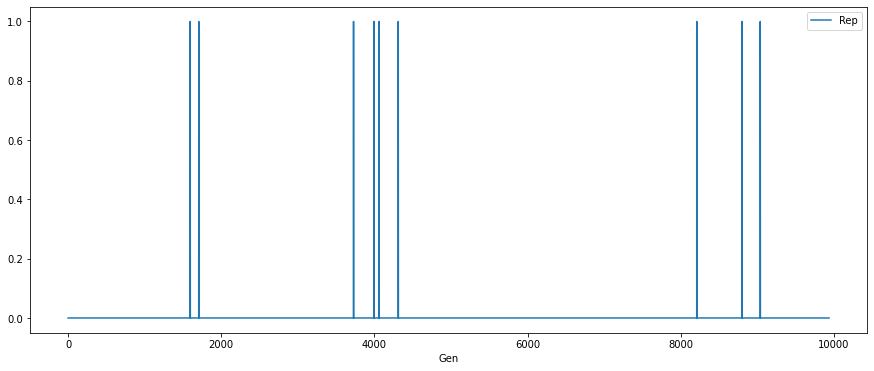

In [220]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

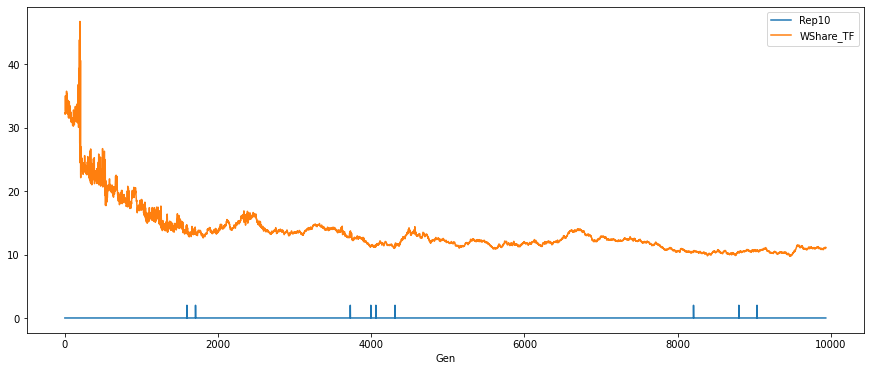

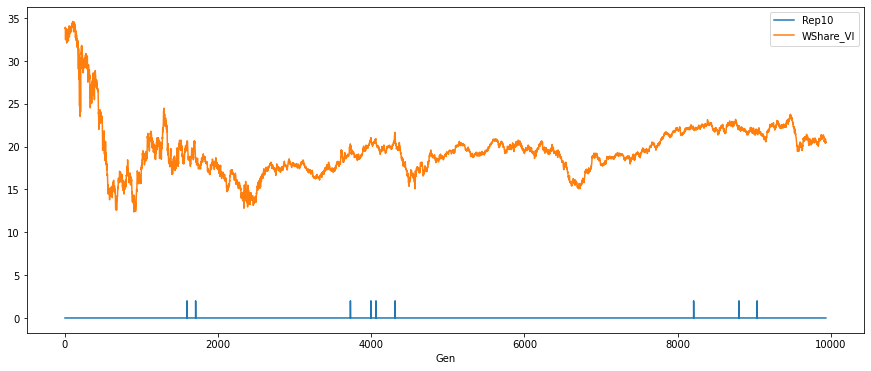

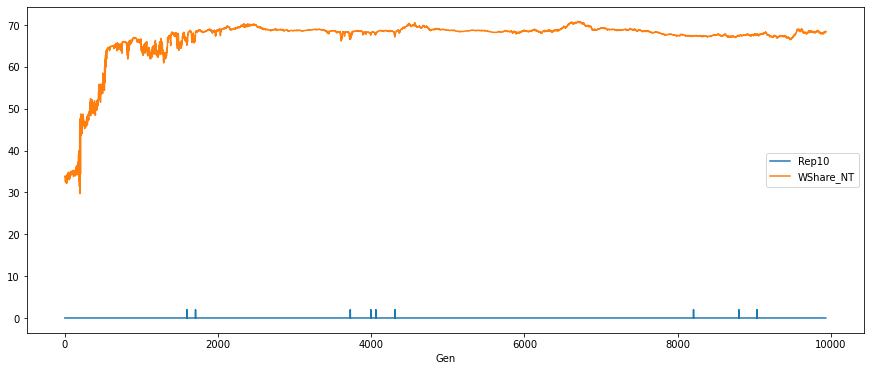

In [221]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

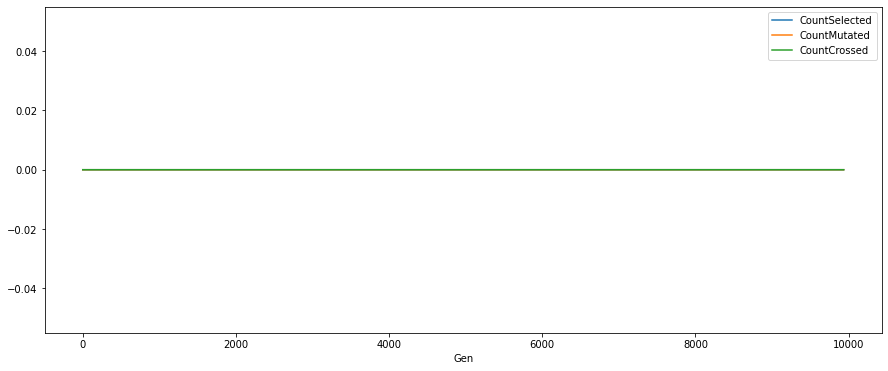

Strategy outflows


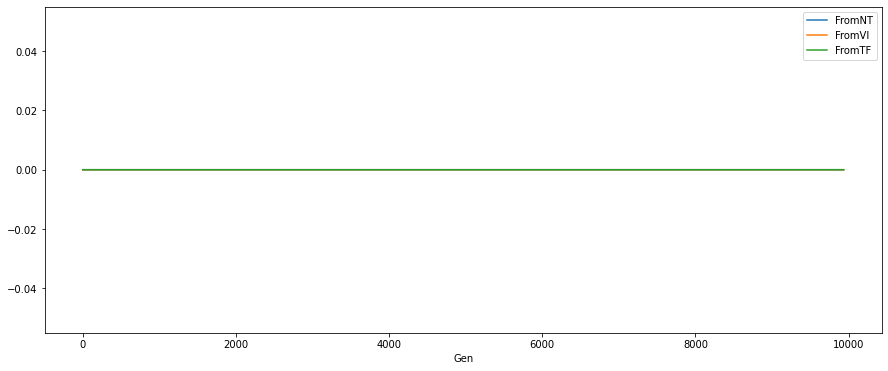

Strategy inflows


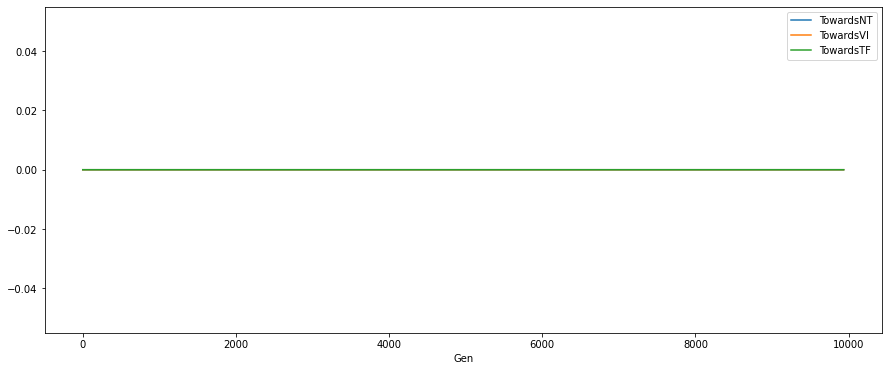

In [222]:
df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
        kind="line", figsize=(15, 6))
plt.show()
print('Strategy outflows')
df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
        kind="line", figsize=(15, 6))
plt.show()
print('Strategy inflows')
df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
        kind="line", figsize=(15, 6))
plt.show()

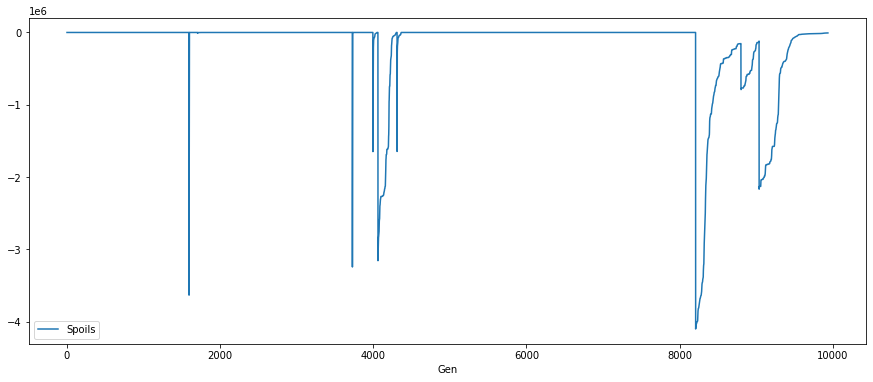

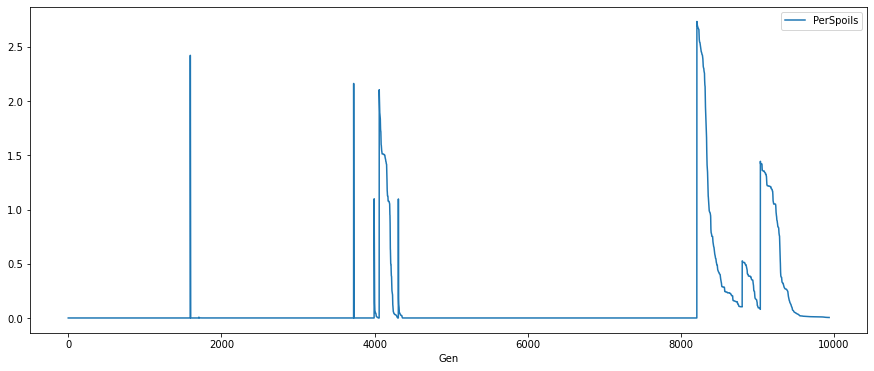

In [223]:

if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

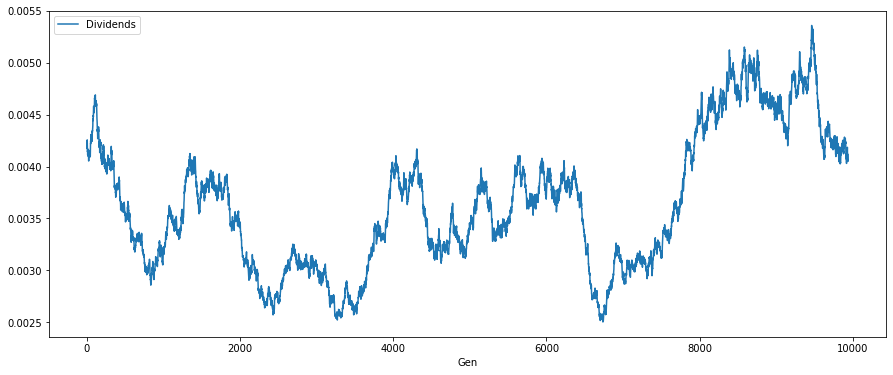

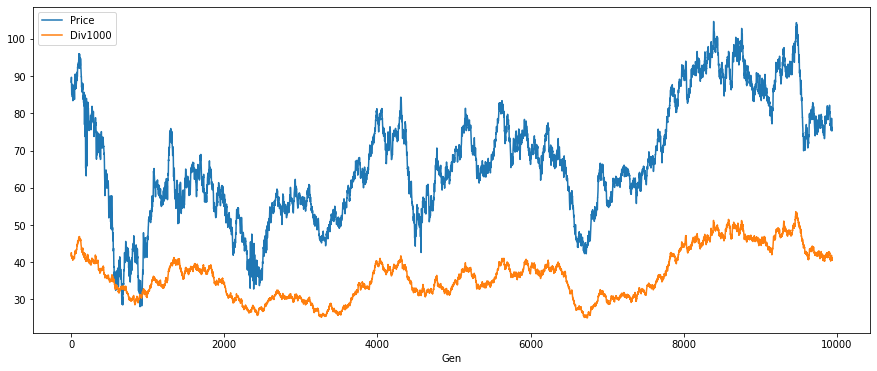

In [224]:
df.plot(x="Gen", y = ["Dividends"],
        kind="line", figsize=(15, 6))
plt.show()


df['Div1000'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Div1000'],
        kind="line", figsize=(15, 6))
plt.show()




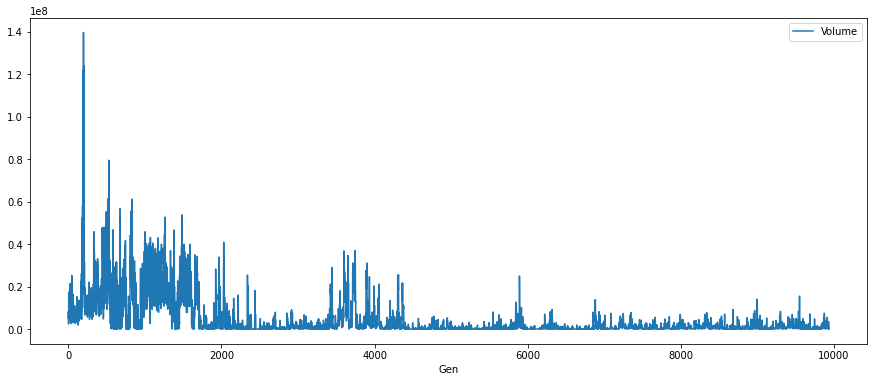

In [225]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

In [226]:
window = 21  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window
time_horizon = 252 

# df['log_rtn'] = np.log(df['Price']).diff()
# df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
# df['real_vol'] = np.sqrt(df['real_var'])

# df['real_var'] = np.square(df['log_rtn']).rolling(window).sum() * ann_factor
# df['real_vol'] = np.sqrt(df['real_var'])

# df.plot(x="Gen", y = ['real_vol'],
#         kind="line", figsize=(15, 6))
# plt.show()


# corr = df['real_vol'].corr(df['Volume'])
# print(corr)
# df['Volatility (1Y EMA, x2M)'] = pd.Series.ewm(2000000 * df['real_vol'], span=time_horizon).mean()
# df['Volume (1Y EMA)'] = pd.Series.ewm(df['Volume'], span=time_horizon).mean()
# df.plot(x="Gen", y = ["Volatility (1Y EMA, x2M)", "Volume (1Y EMA)"],
#         kind="line", figsize=(15, 6))
# # plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/volume_volatility.png', dpi = 300)
# plt.show()


# corr = df['real_vol'].corr(df['AvgMonReturn'])
# print(corr)
# df['Average Monthly Returns (10Y EMA, %)'] = pd.Series.ewm(100 * df['AvgMonReturn'], span=10*time_horizon).mean()[50:]
# df['Volatility (1Y EMA, x10)'] = pd.Series.ewm(10 * df['real_vol'], span=time_horizon).mean()[50:]
# df.plot(x="Gen", y = ["Volatility (1Y EMA, x10)", "Average Monthly Returns (10Y EMA, %)"],
#         kind="line", figsize=(15, 6))
# # plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/returns_volatility.png', dpi = 300)
# plt.show()



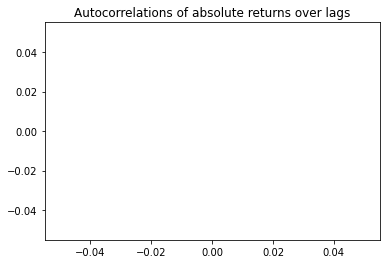

kurtosis: 0
skewness: 0
mean/std ratio
nan


/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_12724/640065517.py:18: RuntimeWarning: invalid value encountered in double_scalars
  print(df['AvgDayReturn'].mean() / df['AvgDayReturn'].std())


In [227]:
''' Slow decay of autocorrelation in absolute returns '''

absolute_autocorrelations = []
for i in range(21):
        absolute_autocorrelations.append(abs(df['AvgDayReturn']).autocorr(lag=i))
plt.plot(absolute_autocorrelations)
plt.title('Autocorrelations of absolute returns over lags')
plt.show()

''' Heavy tails '''

kurtosis = df['AvgDayReturn'].kurtosis()
print('kurtosis: ' + str(kurtosis))
skew = df['AvgDayReturn'].skew()
print('skewness: ' + str(skew))

print('mean/std ratio')
print(df['AvgDayReturn'].mean() / df['AvgDayReturn'].std())


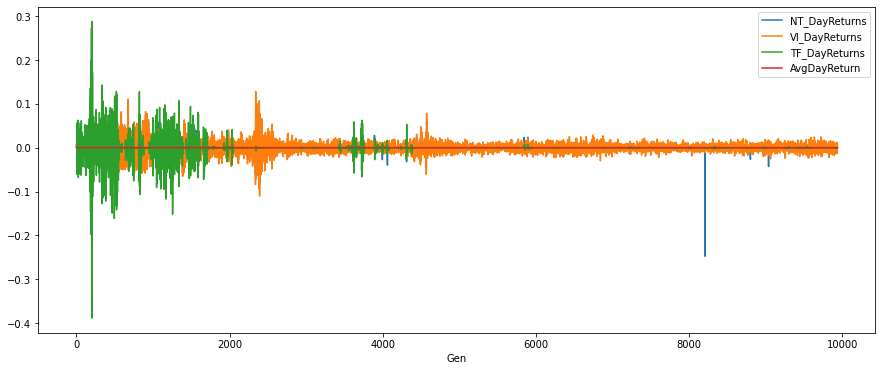

In [228]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

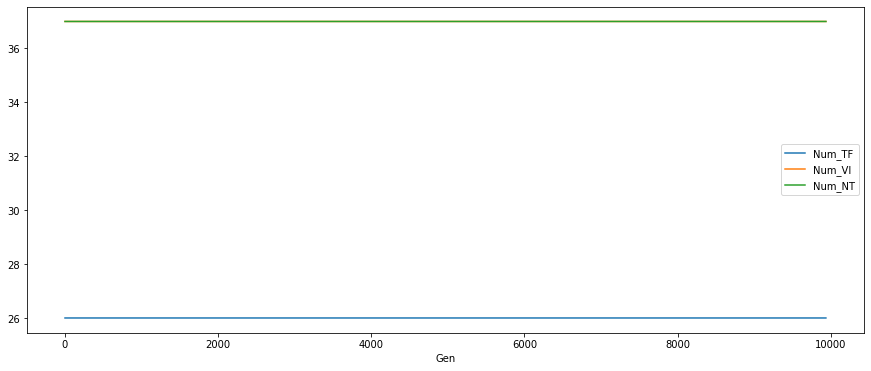

In [229]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


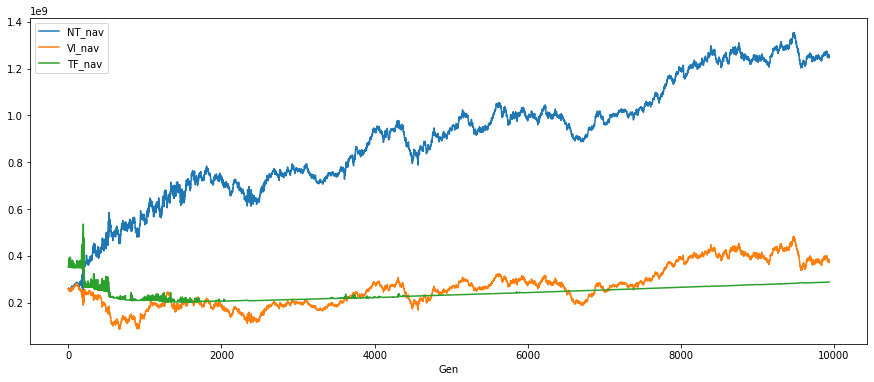

In [230]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


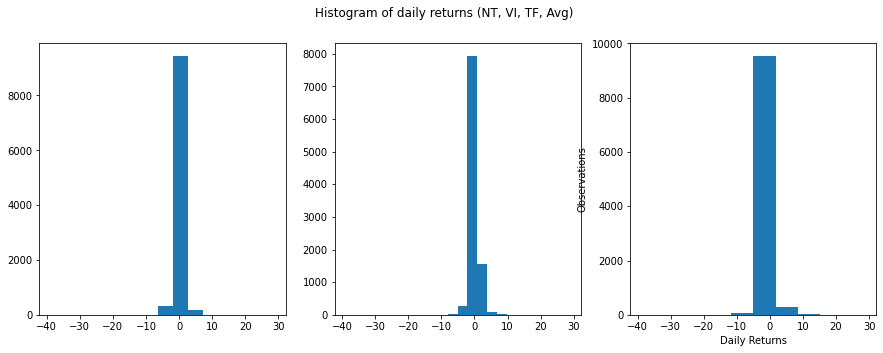

[-0.2475742271963766, 0.2101344193772835]
[-0.1103262806274061, 0.1865638353216641]
[-0.3885761064831524, 0.288133532288406]
[0.00014679477019951658, 0.00012295071884614183]
[0.00012307714441768582, 8.979252385779216e-05]
[0.00010358072534541068, 0.00010693671464883407]


In [231]:
''' Histogram of the daily strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = True)
fig.suptitle('Histogram of daily returns (NT, VI, TF, Avg)')
ax1.hist(100 * df['NT_DayReturns'])
ax2.hist(100 * df['VI_DayReturns'])
ax3.hist(100 * df['TF_DayReturns'])
ax3.set_ylabel('Observations')
ax3.set_xlabel('Daily Returns')
plt.show()

print([min(df['NT_DayReturns']), max(df['NT_DayReturns'])])
print([min(df['VI_DayReturns']), max(df['VI_DayReturns'])])
print([min(df['TF_DayReturns']), max(df['TF_DayReturns'])])

from scipy import stats
print(  [np.nanmean(df['NT_DayReturns']) , stats.trim_mean(df['NT_DayReturns'], 0.001)])
print(  [np.nanmean(df['VI_DayReturns']) , stats.trim_mean(df['VI_DayReturns'], 0.001)])
print(  [np.nanmean(df['TF_DayReturns']) , stats.trim_mean(df['TF_DayReturns'], 0.001)])






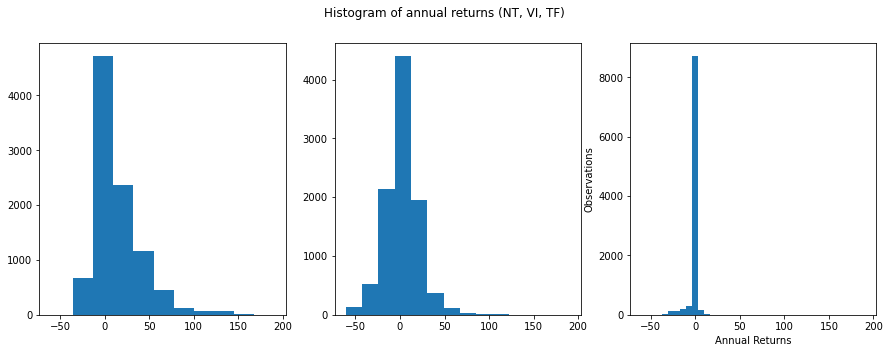

In [232]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = True)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')
ax1.hist(100 * df['NT_AnnualReturns'])
ax2.hist(100 * df['VI_AnnualReturns'])
ax3.hist(100 * df['TF_AnnualReturns'])
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

0.00014679477019951658
0.00012307714441768582
0.00010358072534541068
0.0


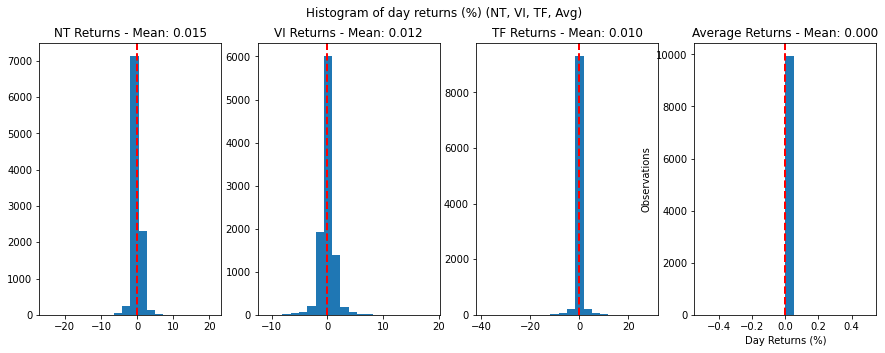

In [233]:
print(df['NT_DayReturns'].mean())
print(df['VI_DayReturns'].mean())
print(df['TF_DayReturns'].mean())
print(df['AvgDayReturn'].mean())

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of day returns (%) (NT, VI, TF, Avg)')
ax1.hist(100 * df['NT_DayReturns'], bins = 20)
ax1.axvline(x=100 * df['NT_DayReturns'].mean(), color='r', linestyle='dashed', linewidth=2)
num = 100 * df['NT_DayReturns'].mean()
ax1.set_title('NT Returns - Mean: %1.3f' % num)

ax2.hist(100 * df['VI_DayReturns'], bins = 20)
num = 100 * df['VI_DayReturns'].mean()
ax2.set_title('VI Returns - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_DayReturns'], bins = 20)
num = 100 * df['TF_DayReturns'].mean()
ax3.set_title('TF Returns - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax4.hist(100 * df['AvgDayReturn'], bins = 20)
num = 100 * df['AvgDayReturn'].mean()
ax4.set_title('Average Returns - Mean: %1.3f' % num)
ax4.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax4.set_ylabel('Observations')
ax4.set_xlabel('Day Returns (%)')
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/hist_returns.png')
plt.show()

# time_horizon = 252

# df['NT_MonReturns_ema'] = pd.Series.ewm(100 * df['NT_MonReturns'], span=time_horizon).mean()
# df['VI_MonReturns_ema'] = pd.Series.ewm(100 * df['VI_MonReturns'], span=time_horizon).mean()
# df['TF_MonReturns_ema'] = pd.Series.ewm(100 * df['TF_MonReturns'], span=time_horizon).mean()
# df['AvgMonReturn_ema'] = pd.Series.ewm(100 * df['AvgMonReturn'], span=time_horizon).mean()

# ''' Evolution of returns over time '''
# df.plot(x="Gen", y = ["NT_MonReturns_ema", "VI_MonReturns_ema", "TF_MonReturns_ema", "AvgMonReturn_ema"],
#         kind="line", figsize=(15, 6))
# plt.show()



In [234]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.5492031766599061
